In [2]:
import os
import re
import copy
import numpy as np
import pandas as pd
#import pdvega

from scipy.optimize import curve_fit, least_squares
from scipy.signal import savgol_filter

import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
#import seaborn as sns

# idx = pd.IndexSlicelabs = [l.get_label() for l in lns]
# 13
# ax1.legend(lns, labs, loc = 9)
# 14


# mpl.rc_file_defaults()
# mpl.rc('text', usetex = True)
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# params = {'text.latex.preamble': [
# r'\usepackage{sfmath}',
# r'\usepackage{helvet}',
# r'\usepackage{siunitx}',
# r'\sisetup{detect-family = true}',
# r'\usepackage{amsmath}'
# ]}
# plt.rcParams['figure.autolayout'] = True
# plt.rcParams['axes.axisbelow'] = True
# plt.rcParams['axes.grid'] = True
# plt.rc('grid', linestyle='--', linewidth=0.5)
# plt.rc('figure', figsize=(4, 3))
# plt.rc('savefig', dpi=300, bbox='tight')
# plt.rcParams.update(params)
# %matplotlib notebook

import spectral.io.envi as envi
from spectral import *
import lmfit
from lmfit.models import GaussianModel
import rampy as rp
import multiprocessing
import tqdm
from joblib import Parallel, delayed

In [ ]:
spectra = envi.open('fet_12_1.hdr', 'fet_12_1.dat')
shifts = [49.7952,51.7237,53.6521,55.5806,57.5091,59.4375,61.3660,63.2945,65.2229,67.1514,69.0799,71.0084,72.9368,74.8653,76.7938,78.7222,80.6507,82.5792,84.5076,86.4361,88.3646,90.2930,92.2215,94.1500,96.0784,98.0069,99.9354,101.8638,103.7923,105.7208,107.6492,109.5777,111.5062,113.4346,115.3631,117.2916,119.2200,121.1485,123.0770,125.0054,126.9339,128.8624,130.7908,132.7193,134.6478,136.5762,138.5047,140.4332,142.3616,144.2901,146.2186,148.1470,150.0755,152.0040,153.9324,155.8609,157.7894,159.7178,161.6463,163.5748,165.5032,167.4317,169.3602,171.2886,173.2171,175.1456,177.0740,179.0025,180.9310,182.8594,184.7879,186.7164,188.6448,190.5733,192.5018,194.4302,196.3587,198.2872,200.2156,202.1441,204.0726,206.0010,207.9295,209.8580,211.7864,213.7149,215.6434,217.5718,219.5003,221.4288,223.3572,225.2857,227.2142,229.1426,231.0711,232.9996,234.9280,236.8565,238.7850,240.7134,242.6419,244.5704,246.4988,248.4273,250.3558,252.2842,254.2127,256.1412,258.0696,259.9981,261.9266,263.8550,265.7835,267.7120,269.6404,271.5689,273.4974,275.4258,277.3543,279.2828,281.2112,283.1397,285.0682,286.9966,288.9251,290.8536,292.7820,294.7105,296.6390,298.5674,300.4959,302.4244,304.3528,306.2813,308.2098,310.1382,312.0667,313.9952,315.9236,317.8521,319.7806,321.7090,323.6375,325.5660,327.4944,329.4229,331.3514,333.2798,335.2083,337.1368,339.0652,340.9937,342.9222,344.8506,346.7791,348.7076,350.6360,352.5645,354.4930,356.4214,358.3499,360.2784,362.2068,364.1353,366.0638,367.9922,369.9207,371.8492,373.7776,375.7061,377.6346,379.5630,381.4915,383.4200,385.3484,387.2769,389.2054,391.1338,393.0623,394.9908,396.9192,398.8477,400.7762,402.7046,404.6331,406.5616,408.4900,410.4185,412.3470,414.2754,416.2039,418.1324,420.0608,421.9893,423.9178,425.8462,427.7747,429.7032,431.6316,433.5601,435.4886,437.4170,439.3455,441.2740,443.2024,445.1309,447.0594,448.9878,450.9163,452.8448,454.7732,456.7017,458.6302,460.5586,462.4871,464.4156,466.3440,468.2725,470.2010,472.1294,474.0579,475.9864,477.9148,479.8433,481.7718,483.7002,485.6287,487.5572,489.4856,491.4141,493.3426,495.2710,497.1995,499.1280,501.0564,502.9849,504.9134,506.8418,508.7703,510.6988,512.6272,514.5557,516.4842,518.4126,520.3411,522.2696,524.1980,526.1265,528.0550,529.9834,531.9119,533.8404,535.7688,537.6973,539.6258,541.5542,543.4827,545.4112,547.3396,549.2681,551.1966,553.1250,555.0535,556.9820,558.9104,560.8389,562.7674,564.6959,566.6243,568.5528,570.4813,572.4097,574.3382,576.2667,578.1951,580.1236,582.0521,583.9805,585.9090,587.8375,589.7659,591.6944,593.6229,595.5513,597.4798,599.4083,601.3367,603.2652,605.1937,607.1221,609.0506,610.9791,612.9075,614.8360,616.7645,618.6929,620.6214,622.5499,624.4783,626.4068,628.3353,630.2637,632.1922,634.1207,636.0491,637.9776,639.9061,641.8345,643.7630,645.6915,647.6199,649.5484,651.4769,653.4053,655.3338,657.2623,659.1907,661.1192,663.0477,664.9761,666.9046,668.8331,670.7615,672.6900,674.6185,676.5469,678.4754,680.4039,682.3323,684.2608,686.1893,688.1177,690.0462,691.9747,693.9031,695.8316,697.7601,699.6885,701.6170,703.5455,705.4739,707.4024,709.3309,711.2593,713.1878,715.1163,717.0447,718.9732,720.9017,722.8301,724.7586,726.6871,728.6155,730.5440,732.4725,734.4009,736.3294,738.2579,740.1863,742.1148,744.0433,745.9717,747.9002,749.8287,751.7571,753.6856,755.6141,757.5425,759.4710,761.3995,763.3279,765.2564,767.1849,769.1133,771.0418,772.9703,774.8987,776.8272,778.7557,780.6841,782.6126,784.5411,786.4695,788.3980,790.3265,792.2549,794.1834,796.1119,798.0403,799.9688,801.8973,803.8257,805.7542,807.6827,809.6111,811.5396,813.4681,815.3965,817.3250,819.2535,821.1819,823.1104,825.0389,826.9673,828.8958,830.8243,832.7527,834.6812,836.6097,838.5381,840.4666,842.3951,844.3235,846.2520,848.1805,850.1089,852.0374,853.9659,855.8943,857.8228,859.7513,861.6797,863.6082,865.5367,867.4651,869.3936,871.3221,873.2505,875.1790,877.1075,879.0359,880.9644,882.8929,884.8213,886.7498,888.6783,890.6067,892.5352,894.4637,896.3921,898.3206,900.2491,902.1775,904.1060,906.0345,907.9629,909.8914,911.8199,913.7483,915.6768,917.6053,919.5337,921.4622,923.3907,925.3191,927.2476,929.1761,931.1045,933.0330,934.9615,936.8899,938.8184,940.7469,942.6753,944.6038,946.5323,948.4607,950.3892,952.3177,954.2461,956.1746,958.1031,960.0315,961.9600,963.8885,965.8169,967.7454,969.6739,971.6023,973.5308,975.4593,977.3877,979.3162,981.2447,983.1731,985.1016,987.0301,988.9585,990.8870,992.8155,994.7439,996.6724,998.6009,1000.5293,1002.4578,1004.3863,1006.3147,1008.2432,1010.1717,1012.1001,1014.0286,1015.9571,1017.8855,1019.8140,1021.7425,1023.6709,1025.5994,1027.5279,1029.4563,1031.3848,1033.3133,1035.2417,1037.1702,1039.0987,1041.0271,1042.9556,1044.8841,1046.8125,1048.7410,1050.6695,1052.5979,1054.5264,1056.4549,1058.3834,1060.3118,1062.2403,1064.1688,1066.0972,1068.0257,1069.9542,1071.8826,1073.8111,1075.7396,1077.6680,1079.5965,1081.5250,1083.4534,1085.3819,1087.3104,1089.2388,1091.1673,1093.0958,1095.0242,1096.9527,1098.8812,1100.8096,1102.7381,1104.6666,1106.5950,1108.5235,1110.4520,1112.3804,1114.3089,1116.2374,1118.1658,1120.0943,1122.0228,1123.9512,1125.8797,1127.8082,1129.7366,1131.6651,1133.5936,1135.5220,1137.4505,1139.3790,1141.3074,1143.2359,1145.1644,1147.0928,1149.0213,1150.9498,1152.8782,1154.8067,1156.7352,1158.6636,1160.5921,1162.5206,1164.4490,1166.3775,1168.3060,1170.2344,1172.1629,1174.0914,1176.0198,1177.9483,1179.8768,1181.8052,1183.7337,1185.6622,1187.5906,1189.5191,1191.4476,1193.3760,1195.3045,1197.2330,1199.1614,1201.0899,1203.0184,1204.9468,1206.8753,1208.8038,1210.7322,1212.6607,1214.5892,1216.5176,1218.4461,1220.3746,1222.3030,1224.2315,1226.1600,1228.0884,1230.0169,1231.9454,1233.8738,1235.8023,1237.7308,1239.6592,1241.5877,1243.5162,1245.4446,1247.3731,1249.3016,1251.2300,1253.1585,1255.0870,1257.0154,1258.9439,1260.8724,1262.8008,1264.7293,1266.6578,1268.5862,1270.5147,1272.4432,1274.3716,1276.3001,1278.2286,1280.1570,1282.0855,1284.0140,1285.9424,1287.8709,1289.7994,1291.7278,1293.6563,1295.5848,1297.5132,1299.4417,1301.3702,1303.2986,1305.2271,1307.1556,1309.0840,1311.0125,1312.9410,1314.8694,1316.7979,1318.7264,1320.6548,1322.5833,1324.5118,1326.4402,1328.3687,1330.2972,1332.2256,1334.1541,1336.0826,1338.0110,1339.9395,1341.8680,1343.7964,1345.7249,1347.6534,1349.5818,1351.5103,1353.4388,1355.3672,1357.2957,1359.2242,1361.1526,1363.0811,1365.0096,1366.9380,1368.8665,1370.7950,1372.7234,1374.6519,1376.5804,1378.5088,1380.4373,1382.3658,1384.2942,1386.2227,1388.1512,1390.0796,1392.0081,1393.9366,1395.8650,1397.7935,1399.7220,1401.6504,1403.5789,1405.5074,1407.4358,1409.3643,1411.2928,1413.2212,1415.1497,1417.0782,1419.0066,1420.9351,1422.8636,1424.7920,1426.7205,1428.6490,1430.5774,1432.5059,1434.4344,1436.3628,1438.2913,1440.2198,1442.1482,1444.0767,1446.0052,1447.9336,1449.8621,1451.7906,1453.7190,1455.6475,1457.5760,1459.5044,1461.4329,1463.3614,1465.2898,1467.2183,1469.1468,1471.0752,1473.0037,1474.9322,1476.8606,1478.7891,1480.7176,1482.6460,1484.5745,1486.5030,1488.4314,1490.3599,1492.2884,1494.2168,1496.1453,1498.0738,1500.0022,1501.9307,1503.8592,1505.7876,1507.7161,1509.6446,1511.5730,1513.5015,1515.4300,1517.3584,1519.2869,1521.2154,1523.1438,1525.0723,1527.0008,1528.9292,1530.8577,1532.7862,1534.7146,1536.6431,1538.5716,1540.5000,1542.4285,1544.3570,1546.2854,1548.2139,1550.1424,1552.0709,1553.9993,1555.9278,1557.8563,1559.7847,1561.7132,1563.6417,1565.5701,1567.4986,1569.4271,1571.3555,1573.2840,1575.2125,1577.1409,1579.0694,1580.9979,1582.9263,1584.8548,1586.7833,1588.7117,1590.6402,1592.5687,1594.4971,1596.4256,1598.3541,1600.2825,1602.2110,1604.1395,1606.0679,1607.9964,1609.9249,1611.8533,1613.7818,1615.7103,1617.6387,1619.5672,1621.4957,1623.4241,1625.3526,1627.2811,1629.2095,1631.1380,1633.0665,1634.9949,1636.9234,1638.8519,1640.7803,1642.7088,1644.6373,1646.5657,1648.4942,1650.4227,1652.3511,1654.2796,1656.2081,1658.1365,1660.0650,1661.9935,1663.9219,1665.8504,1667.7789,1669.7073,1671.6358,1673.5643,1675.4927,1677.4212,1679.3497,1681.2781,1683.2066,1685.1351,1687.0635,1688.9920,1690.9205,1692.8489,1694.7774,1696.7059,1698.6343,1700.5628,1702.4913,1704.4197,1706.3482,1708.2767,1710.2051,1712.1336,1714.0621,1715.9905,1717.9190,1719.8475,1721.7759,1723.7044,1725.6329,1727.5613,1729.4898,1731.4183,1733.3467,1735.2752,1737.2037,1739.1321,1741.0606,1742.9891,1744.9175,1746.8460,1748.7745,1750.7029,1752.6314,1754.5599,1756.4883,1758.4168,1760.3453,1762.2737,1764.2022,1766.1307,1768.0591,1769.9876,1771.9161,1773.8445,1775.7730,1777.7015,1779.6299,1781.5584,1783.4869,1785.4153,1787.3438,1789.2723,1791.2007,1793.1292,1795.0577,1796.9861,1798.9146,1800.8431,1802.7715,1804.7000,1806.6285,1808.5569,1810.4854,1812.4139,1814.3423,1816.2708,1818.1993,1820.1277,1822.0562,1823.9847,1825.9131,1827.8416,1829.7701,1831.6985,1833.6270,1835.5555,1837.4839,1839.4124,1841.3409,1843.2693,1845.1978,1847.1263,1849.0547,1850.9832,1852.9117,1854.8401,1856.7686,1858.6971,1860.6255,1862.5540,1864.4825,1866.4109,1868.3394,1870.2679,1872.1963,1874.1248,1876.0533,1877.9817,1879.9102,1881.8387,1883.7671,1885.6956,1887.6241,1889.5525,1891.4810,1893.4095,1895.3379,1897.2664,1899.1949,1901.1233,1903.0518,1904.9803,1906.9087,1908.8372,1910.7657,1912.6941,1914.6226,1916.5511,1918.4795,1920.4080,1922.3365,1924.2649,1926.1934,1928.1219,1930.0503,1931.9788,1933.9073,1935.8357,1937.7642,1939.6927,1941.6211,1943.5496,1945.4781,1947.4065,1949.3350,1951.2635,1953.1919,1955.1204,1957.0489,1958.9773,1960.9058,1962.8343,1964.7627,1966.6912,1968.6197,1970.5481,1972.4766,1974.4051,1976.3335,1978.2620,1980.1905,1982.1189,1984.0474,1985.9759,1987.9043,1989.8328,1991.7613,1993.6897,1995.6182,1997.5467,1999.4751,2001.4036,2003.3321,2005.2605,2007.1890,2009.1175,2011.0459,2012.9744,2014.9029,2016.8313,2018.7598,2020.6883,2022.6167,2024.5452,2026.4737,2028.4021,2030.3306,2032.2591,2034.1875,2036.1160,2038.0445,2039.9729,2041.9014,2043.8299,2045.7584,2047.6868,2049.6153,2051.5438,2053.4722,2055.4007,2057.3292,2059.2576,2061.1861,2063.1146,2065.0430,2066.9715,2068.9000,2070.8284,2072.7569,2074.6854,2076.6138,2078.5423,2080.4708,2082.3992,2084.3277,2086.2562,2088.1846,2090.1131,2092.0416,2093.9700,2095.8985,2097.8270,2099.7554,2101.6839,2103.6124,2105.5408,2107.4693,2109.3978,2111.3262,2113.2547,2115.1832,2117.1116,2119.0401,2120.9686,2122.8970,2124.8255,2126.7540,2128.6824,2130.6109,2132.5394,2134.4678,2136.3963,2138.3248,2140.2532,2142.1817,2144.1102,2146.0386,2147.9671,2149.8956,2151.8240,2153.7525,2155.6810,2157.6094,2159.5379,2161.4664,2163.3948,2165.3233,2167.2518,2169.1802,2171.1087,2173.0372,2174.9656,2176.8941,2178.8226,2180.7510,2182.6795,2184.6080,2186.5364,2188.4649,2190.3934,2192.3218,2194.2503,2196.1788,2198.1072,2200.0357,2201.9642,2203.8926,2205.8211,2207.7496,2209.6780,2211.6065,2213.5350,2215.4634,2217.3919,2219.3204,2221.2488,2223.1773,2225.1058,2227.0342,2228.9627,2230.8912,2232.8196,2234.7481,2236.6766,2238.6050,2240.5335,2242.4620,2244.3904,2246.3189,2248.2474,2250.1758,2252.1043,2254.0328,2255.9612,2257.8897,2259.8182,2261.7466,2263.6751,2265.6036,2267.5320,2269.4605,2271.3890,2273.3174,2275.2459,2277.1744,2279.1028,2281.0313,2282.9598,2284.8882,2286.8167,2288.7452,2290.6736,2292.6021,2294.5306,2296.4590,2298.3875,2300.3160,2302.2444,2304.1729,2306.1014,2308.0298,2309.9583,2311.8868,2313.8152,2315.7437,2317.6722,2319.6006,2321.5291,2323.4576,2325.3860,2327.3145,2329.2430,2331.1714,2333.0999,2335.0284,2336.9568,2338.8853,2340.8138,2342.7422,2344.6707,2346.5992,2348.5276,2350.4561,2352.3846,2354.3130,2356.2415,2358.1700,2360.0984,2362.0269,2363.9554,2365.8838,2367.8123,2369.7408,2371.6692,2373.5977,2375.5262,2377.4546,2379.3831,2381.3116,2383.2400,2385.1685,2387.0970,2389.0254,2390.9539,2392.8824,2394.8108,2396.7393,2398.6678,2400.5962,2402.5247,2404.4532,2406.3816,2408.3101,2410.2386,2412.1670,2414.0955,2416.0240,2417.9524,2419.8809,2421.8094,2423.7378,2425.6663,2427.5948,2429.5232,2431.4517,2433.3802,2435.3086,2437.2371,2439.1656,2441.0940,2443.0225,2444.9510,2446.8794,2448.8079,2450.7364,2452.6648,2454.5933,2456.5218,2458.4502,2460.3787,2462.3072,2464.2356,2466.1641,2468.0926,2470.0210,2471.9495,2473.8780,2475.8064,2477.7349,2479.6634,2481.5918,2483.5203,2485.4488,2487.3772,2489.3057,2491.2342,2493.1626,2495.0911,2497.0196,2498.9480,2500.8765,2502.8050,2504.7334,2506.6619,2508.5904,2510.5188,2512.4473,2514.3758,2516.3042,2518.2327,2520.1612,2522.0896,2524.0181,2525.9466,2527.8750,2529.8035,2531.7320,2533.6604,2535.5889,2537.5174,2539.4459,2541.3743,2543.3028,2545.2313,2547.1597,2549.0882,2551.0167,2552.9451,2554.8736,2556.8021,2558.7305,2560.6590,2562.5875,2564.5159,2566.4444,2568.3729,2570.3013,2572.2298,2574.1583,2576.0867,2578.0152,2579.9437,2581.8721,2583.8006,2585.7291,2587.6575,2589.5860,2591.5145,2593.4429,2595.3714,2597.2999,2599.2283,2601.1568,2603.0853,2605.0137,2606.9422,2608.8707,2610.7991,2612.7276,2614.6561,2616.5845,2618.5130,2620.4415,2622.3699,2624.2984,2626.2269,2628.1553,2630.0838,2632.0123,2633.9407,2635.8692,2637.7977,2639.7261,2641.6546,2643.5831,2645.5115,2647.4400,2649.3685,2651.2969,2653.2254,2655.1539,2657.0823,2659.0108,2660.9393,2662.8677,2664.7962,2666.7247,2668.6531,2670.5816,2672.5101,2674.4385,2676.3670,2678.2955,2680.2239,2682.1524,2684.0809,2686.0093,2687.9378,2689.8663,2691.7947,2693.7232,2695.6517,2697.5801,2699.5086,2701.4371,2703.3655,2705.2940,2707.2225,2709.1509,2711.0794,2713.0079,2714.9363,2716.8648,2718.7933,2720.7217,2722.6502,2724.5787,2726.5071,2728.4356,2730.3641,2732.2925,2734.2210,2736.1495,2738.0779,2740.0064,2741.9349,2743.8633,2745.7918,2747.7203,2749.6487,2751.5772,2753.5057,2755.4341,2757.3626,2759.2911,2761.2195,2763.1480,2765.0765,2767.0049,2768.9334,2770.8619,2772.7903,2774.7188,2776.6473,2778.5757,2780.5042,2782.4327,2784.3611,2786.2896,2788.2181,2790.1465,2792.0750,2794.0035,2795.9319,2797.8604,2799.7889,2801.7173,2803.6458,2805.5743,2807.5027,2809.4312,2811.3597,2813.2881,2815.2166,2817.1451,2819.0735,2821.0020,2822.9305,2824.8589,2826.7874,2828.7159,2830.6443,2832.5728,2834.5013,2836.4297,2838.3582,2840.2867,2842.2151,2844.1436,2846.0721,2848.0005,2849.9290,2851.8575,2853.7859,2855.7144,2857.6429,2859.5713,2861.4998,2863.4283,2865.3567,2867.2852,2869.2137,2871.1421,2873.0706,2874.9991,2876.9275,2878.8560,2880.7845,2882.7129,2884.6414,2886.5699,2888.4983,2890.4268,2892.3553,2894.2837,2896.2122,2898.1407,2900.0691,2901.9976,2903.9261,2905.8545,2907.7830,2909.7115,2911.6399,2913.5684,2915.4969,2917.4253,2919.3538,2921.2823,2923.2107,2925.1392,2927.0677,2928.9961,2930.9246,2932.8531,2934.7815,2936.7100,2938.6385,2940.5669,2942.4954,2944.4239,2946.3523,2948.2808,2950.2093,2952.1377,2954.0662,2955.9947,2957.9231,2959.8516,2961.7801,2963.7085,2965.6370,2967.5655,2969.4939,2971.4224,2973.3509,2975.2793,2977.2078,2979.1363,2981.0647,2982.9932,2984.9217,2986.8501,2988.7786,2990.7071,2992.6355,2994.5640,2996.4925,2998.4209,3000.3494,3002.2779,3004.2063,3006.1348,3008.0633,3009.9917,3011.9202,3013.8487,3015.7771,3017.7056,3019.6341,3021.5625,3023.4910,3025.4195,3027.3479,3029.2764,3031.2049,3033.1334,3035.0618,3036.9903,3038.9188,3040.8472,3042.7757,3044.7042,3046.6326,3048.5611,3050.4896,3052.4180,3054.3465,3056.2750,3058.2034,3060.1319,3062.0604,3063.9888,3065.9173,3067.8458,3069.7742,3071.7027,3073.6312,3075.5596,3077.4881,3079.4166,3081.3450,3083.2735,3085.2020,3087.1304,3089.0589,3090.9874,3092.9158,3094.8443,3096.7728,3098.7012,3100.6297,3102.5582,3104.4866,3106.4151,3108.3436,3110.2720,3112.2005,3114.1290,3116.0574,3117.9859,3119.9144,3121.8428,3123.7713,3125.6998,3127.6282,3129.5567,3131.4852,3133.4136,3135.3421,3137.2706,3139.1990,3141.1275,3143.0560,3144.9844,3146.9129,3148.8414,3150.7698,3152.6983,3154.6268,3156.5552,3158.4837,3160.4122,3162.3406,3164.2691,3166.1976,3168.1260,3170.0545,3171.9830,3173.9114,3175.8399,3177.7684,3179.6968,3181.6253,3183.5538,3185.4822,3187.4107,3189.3392,3191.2676,3193.1961,3195.1246,3197.0530,3198.9815,3200.9100,3202.8384,3204.7669,3206.6954,3208.6238,3210.5523,3212.4808,3214.4092,3216.3377,3218.2662,3220.1946,3222.1231,3224.0516,3225.9800,3227.9085,3229.8370,3231.7654,3233.6939,3235.6224,3237.5508,3239.4793,3241.4078,3243.3362,3245.2647,3247.1932,3249.1216,3251.0501,3252.9786,3254.9070,3256.8355,3258.7640,3260.6924,3262.6209,3264.5494,3266.4778,3268.4063,3270.3348,3272.2632,3274.1917,3276.1202,3278.0486,3279.9771,3281.9056,3283.8340,3285.7625,3287.6910,3289.6194,3291.5479,3293.4764,3295.4048,3297.3333,3299.2618,3301.1902,3303.1187,3305.0472,3306.9756,3308.9041,3310.8326,3312.7610,3314.6895,3316.6180,3318.5464,3320.4749,3322.4034,3324.3318,3326.2603,3328.1888,3330.1172,3332.0457,3333.9742,3335.9026,3337.8311,3339.7596,3341.6880,3343.6165,3345.5450,3347.4734,3349.4019,3351.3304,3353.2588,3355.1873,3357.1158,3359.0442,3360.9727,3362.9012,3364.8296,3366.7581,3368.6866,3370.6150,3372.5435,3374.4720,3376.4004,3378.3289,3380.2574,3382.1858,3384.1143,3386.0428,3387.9712,3389.8997,3391.8282,3393.7566,3395.6851,3397.6136,3399.5420]
roi = np.array([[0,1500],[1700,2500],[2850,3399]])

spectra_arr = []

for i in range(0, 190):
    
    for j in range(0, 190):
        
        spectra_arr.append(spectra.read_pixel(i, j))

In [ ]:
def calc(spectra, shifts, roi):
    
    temp = spectra.read_pixel(row, col)
    
    ycalc_poly, base_poly = rp.baseline(np.array(shifts),temp, roi ,'als')
    
    return ycalc_poly, base_poly

In [ ]:
num_cores = multiprocessing.cpu_count()
inputs = tqdm(myList)

if __name__ == "__main__":
    processed_list = Parallel(n_jobs=num_cores)(delayed(myfunction)(i,parameters) for i in inputs)

In [4]:
img2 = envi.open('p_p_10_s_al2o3_o.hdr', 'p_p_10_s_al2o3_o.dat')
lib = envi.open('p_p_10_s_al2o3_o.hdr')
shifts = [49.7952,51.7237,53.6521,55.5806,57.5091,59.4375,61.3660,63.2945,65.2229,67.1514,69.0799,71.0084,72.9368,74.8653,76.7938,78.7222,80.6507,82.5792,84.5076,86.4361,88.3646,90.2930,92.2215,94.1500,96.0784,98.0069,99.9354,101.8638,103.7923,105.7208,107.6492,109.5777,111.5062,113.4346,115.3631,117.2916,119.2200,121.1485,123.0770,125.0054,126.9339,128.8624,130.7908,132.7193,134.6478,136.5762,138.5047,140.4332,142.3616,144.2901,146.2186,148.1470,150.0755,152.0040,153.9324,155.8609,157.7894,159.7178,161.6463,163.5748,165.5032,167.4317,169.3602,171.2886,173.2171,175.1456,177.0740,179.0025,180.9310,182.8594,184.7879,186.7164,188.6448,190.5733,192.5018,194.4302,196.3587,198.2872,200.2156,202.1441,204.0726,206.0010,207.9295,209.8580,211.7864,213.7149,215.6434,217.5718,219.5003,221.4288,223.3572,225.2857,227.2142,229.1426,231.0711,232.9996,234.9280,236.8565,238.7850,240.7134,242.6419,244.5704,246.4988,248.4273,250.3558,252.2842,254.2127,256.1412,258.0696,259.9981,261.9266,263.8550,265.7835,267.7120,269.6404,271.5689,273.4974,275.4258,277.3543,279.2828,281.2112,283.1397,285.0682,286.9966,288.9251,290.8536,292.7820,294.7105,296.6390,298.5674,300.4959,302.4244,304.3528,306.2813,308.2098,310.1382,312.0667,313.9952,315.9236,317.8521,319.7806,321.7090,323.6375,325.5660,327.4944,329.4229,331.3514,333.2798,335.2083,337.1368,339.0652,340.9937,342.9222,344.8506,346.7791,348.7076,350.6360,352.5645,354.4930,356.4214,358.3499,360.2784,362.2068,364.1353,366.0638,367.9922,369.9207,371.8492,373.7776,375.7061,377.6346,379.5630,381.4915,383.4200,385.3484,387.2769,389.2054,391.1338,393.0623,394.9908,396.9192,398.8477,400.7762,402.7046,404.6331,406.5616,408.4900,410.4185,412.3470,414.2754,416.2039,418.1324,420.0608,421.9893,423.9178,425.8462,427.7747,429.7032,431.6316,433.5601,435.4886,437.4170,439.3455,441.2740,443.2024,445.1309,447.0594,448.9878,450.9163,452.8448,454.7732,456.7017,458.6302,460.5586,462.4871,464.4156,466.3440,468.2725,470.2010,472.1294,474.0579,475.9864,477.9148,479.8433,481.7718,483.7002,485.6287,487.5572,489.4856,491.4141,493.3426,495.2710,497.1995,499.1280,501.0564,502.9849,504.9134,506.8418,508.7703,510.6988,512.6272,514.5557,516.4842,518.4126,520.3411,522.2696,524.1980,526.1265,528.0550,529.9834,531.9119,533.8404,535.7688,537.6973,539.6258,541.5542,543.4827,545.4112,547.3396,549.2681,551.1966,553.1250,555.0535,556.9820,558.9104,560.8389,562.7674,564.6959,566.6243,568.5528,570.4813,572.4097,574.3382,576.2667,578.1951,580.1236,582.0521,583.9805,585.9090,587.8375,589.7659,591.6944,593.6229,595.5513,597.4798,599.4083,601.3367,603.2652,605.1937,607.1221,609.0506,610.9791,612.9075,614.8360,616.7645,618.6929,620.6214,622.5499,624.4783,626.4068,628.3353,630.2637,632.1922,634.1207,636.0491,637.9776,639.9061,641.8345,643.7630,645.6915,647.6199,649.5484,651.4769,653.4053,655.3338,657.2623,659.1907,661.1192,663.0477,664.9761,666.9046,668.8331,670.7615,672.6900,674.6185,676.5469,678.4754,680.4039,682.3323,684.2608,686.1893,688.1177,690.0462,691.9747,693.9031,695.8316,697.7601,699.6885,701.6170,703.5455,705.4739,707.4024,709.3309,711.2593,713.1878,715.1163,717.0447,718.9732,720.9017,722.8301,724.7586,726.6871,728.6155,730.5440,732.4725,734.4009,736.3294,738.2579,740.1863,742.1148,744.0433,745.9717,747.9002,749.8287,751.7571,753.6856,755.6141,757.5425,759.4710,761.3995,763.3279,765.2564,767.1849,769.1133,771.0418,772.9703,774.8987,776.8272,778.7557,780.6841,782.6126,784.5411,786.4695,788.3980,790.3265,792.2549,794.1834,796.1119,798.0403,799.9688,801.8973,803.8257,805.7542,807.6827,809.6111,811.5396,813.4681,815.3965,817.3250,819.2535,821.1819,823.1104,825.0389,826.9673,828.8958,830.8243,832.7527,834.6812,836.6097,838.5381,840.4666,842.3951,844.3235,846.2520,848.1805,850.1089,852.0374,853.9659,855.8943,857.8228,859.7513,861.6797,863.6082,865.5367,867.4651,869.3936,871.3221,873.2505,875.1790,877.1075,879.0359,880.9644,882.8929,884.8213,886.7498,888.6783,890.6067,892.5352,894.4637,896.3921,898.3206,900.2491,902.1775,904.1060,906.0345,907.9629,909.8914,911.8199,913.7483,915.6768,917.6053,919.5337,921.4622,923.3907,925.3191,927.2476,929.1761,931.1045,933.0330,934.9615,936.8899,938.8184,940.7469,942.6753,944.6038,946.5323,948.4607,950.3892,952.3177,954.2461,956.1746,958.1031,960.0315,961.9600,963.8885,965.8169,967.7454,969.6739,971.6023,973.5308,975.4593,977.3877,979.3162,981.2447,983.1731,985.1016,987.0301,988.9585,990.8870,992.8155,994.7439,996.6724,998.6009,1000.5293,1002.4578,1004.3863,1006.3147,1008.2432,1010.1717,1012.1001,1014.0286,1015.9571,1017.8855,1019.8140,1021.7425,1023.6709,1025.5994,1027.5279,1029.4563,1031.3848,1033.3133,1035.2417,1037.1702,1039.0987,1041.0271,1042.9556,1044.8841,1046.8125,1048.7410,1050.6695,1052.5979,1054.5264,1056.4549,1058.3834,1060.3118,1062.2403,1064.1688,1066.0972,1068.0257,1069.9542,1071.8826,1073.8111,1075.7396,1077.6680,1079.5965,1081.5250,1083.4534,1085.3819,1087.3104,1089.2388,1091.1673,1093.0958,1095.0242,1096.9527,1098.8812,1100.8096,1102.7381,1104.6666,1106.5950,1108.5235,1110.4520,1112.3804,1114.3089,1116.2374,1118.1658,1120.0943,1122.0228,1123.9512,1125.8797,1127.8082,1129.7366,1131.6651,1133.5936,1135.5220,1137.4505,1139.3790,1141.3074,1143.2359,1145.1644,1147.0928,1149.0213,1150.9498,1152.8782,1154.8067,1156.7352,1158.6636,1160.5921,1162.5206,1164.4490,1166.3775,1168.3060,1170.2344,1172.1629,1174.0914,1176.0198,1177.9483,1179.8768,1181.8052,1183.7337,1185.6622,1187.5906,1189.5191,1191.4476,1193.3760,1195.3045,1197.2330,1199.1614,1201.0899,1203.0184,1204.9468,1206.8753,1208.8038,1210.7322,1212.6607,1214.5892,1216.5176,1218.4461,1220.3746,1222.3030,1224.2315,1226.1600,1228.0884,1230.0169,1231.9454,1233.8738,1235.8023,1237.7308,1239.6592,1241.5877,1243.5162,1245.4446,1247.3731,1249.3016,1251.2300,1253.1585,1255.0870,1257.0154,1258.9439,1260.8724,1262.8008,1264.7293,1266.6578,1268.5862,1270.5147,1272.4432,1274.3716,1276.3001,1278.2286,1280.1570,1282.0855,1284.0140,1285.9424,1287.8709,1289.7994,1291.7278,1293.6563,1295.5848,1297.5132,1299.4417,1301.3702,1303.2986,1305.2271,1307.1556,1309.0840,1311.0125,1312.9410,1314.8694,1316.7979,1318.7264,1320.6548,1322.5833,1324.5118,1326.4402,1328.3687,1330.2972,1332.2256,1334.1541,1336.0826,1338.0110,1339.9395,1341.8680,1343.7964,1345.7249,1347.6534,1349.5818,1351.5103,1353.4388,1355.3672,1357.2957,1359.2242,1361.1526,1363.0811,1365.0096,1366.9380,1368.8665,1370.7950,1372.7234,1374.6519,1376.5804,1378.5088,1380.4373,1382.3658,1384.2942,1386.2227,1388.1512,1390.0796,1392.0081,1393.9366,1395.8650,1397.7935,1399.7220,1401.6504,1403.5789,1405.5074,1407.4358,1409.3643,1411.2928,1413.2212,1415.1497,1417.0782,1419.0066,1420.9351,1422.8636,1424.7920,1426.7205,1428.6490,1430.5774,1432.5059,1434.4344,1436.3628,1438.2913,1440.2198,1442.1482,1444.0767,1446.0052,1447.9336,1449.8621,1451.7906,1453.7190,1455.6475,1457.5760,1459.5044,1461.4329,1463.3614,1465.2898,1467.2183,1469.1468,1471.0752,1473.0037,1474.9322,1476.8606,1478.7891,1480.7176,1482.6460,1484.5745,1486.5030,1488.4314,1490.3599,1492.2884,1494.2168,1496.1453,1498.0738,1500.0022,1501.9307,1503.8592,1505.7876,1507.7161,1509.6446,1511.5730,1513.5015,1515.4300,1517.3584,1519.2869,1521.2154,1523.1438,1525.0723,1527.0008,1528.9292,1530.8577,1532.7862,1534.7146,1536.6431,1538.5716,1540.5000,1542.4285,1544.3570,1546.2854,1548.2139,1550.1424,1552.0709,1553.9993,1555.9278,1557.8563,1559.7847,1561.7132,1563.6417,1565.5701,1567.4986,1569.4271,1571.3555,1573.2840,1575.2125,1577.1409,1579.0694,1580.9979,1582.9263,1584.8548,1586.7833,1588.7117,1590.6402,1592.5687,1594.4971,1596.4256,1598.3541,1600.2825,1602.2110,1604.1395,1606.0679,1607.9964,1609.9249,1611.8533,1613.7818,1615.7103,1617.6387,1619.5672,1621.4957,1623.4241,1625.3526,1627.2811,1629.2095,1631.1380,1633.0665,1634.9949,1636.9234,1638.8519,1640.7803,1642.7088,1644.6373,1646.5657,1648.4942,1650.4227,1652.3511,1654.2796,1656.2081,1658.1365,1660.0650,1661.9935,1663.9219,1665.8504,1667.7789,1669.7073,1671.6358,1673.5643,1675.4927,1677.4212,1679.3497,1681.2781,1683.2066,1685.1351,1687.0635,1688.9920,1690.9205,1692.8489,1694.7774,1696.7059,1698.6343,1700.5628,1702.4913,1704.4197,1706.3482,1708.2767,1710.2051,1712.1336,1714.0621,1715.9905,1717.9190,1719.8475,1721.7759,1723.7044,1725.6329,1727.5613,1729.4898,1731.4183,1733.3467,1735.2752,1737.2037,1739.1321,1741.0606,1742.9891,1744.9175,1746.8460,1748.7745,1750.7029,1752.6314,1754.5599,1756.4883,1758.4168,1760.3453,1762.2737,1764.2022,1766.1307,1768.0591,1769.9876,1771.9161,1773.8445,1775.7730,1777.7015,1779.6299,1781.5584,1783.4869,1785.4153,1787.3438,1789.2723,1791.2007,1793.1292,1795.0577,1796.9861,1798.9146,1800.8431,1802.7715,1804.7000,1806.6285,1808.5569,1810.4854,1812.4139,1814.3423,1816.2708,1818.1993,1820.1277,1822.0562,1823.9847,1825.9131,1827.8416,1829.7701,1831.6985,1833.6270,1835.5555,1837.4839,1839.4124,1841.3409,1843.2693,1845.1978,1847.1263,1849.0547,1850.9832,1852.9117,1854.8401,1856.7686,1858.6971,1860.6255,1862.5540,1864.4825,1866.4109,1868.3394,1870.2679,1872.1963,1874.1248,1876.0533,1877.9817,1879.9102,1881.8387,1883.7671,1885.6956,1887.6241,1889.5525,1891.4810,1893.4095,1895.3379,1897.2664,1899.1949,1901.1233,1903.0518,1904.9803,1906.9087,1908.8372,1910.7657,1912.6941,1914.6226,1916.5511,1918.4795,1920.4080,1922.3365,1924.2649,1926.1934,1928.1219,1930.0503,1931.9788,1933.9073,1935.8357,1937.7642,1939.6927,1941.6211,1943.5496,1945.4781,1947.4065,1949.3350,1951.2635,1953.1919,1955.1204,1957.0489,1958.9773,1960.9058,1962.8343,1964.7627,1966.6912,1968.6197,1970.5481,1972.4766,1974.4051,1976.3335,1978.2620,1980.1905,1982.1189,1984.0474,1985.9759,1987.9043,1989.8328,1991.7613,1993.6897,1995.6182,1997.5467,1999.4751,2001.4036,2003.3321,2005.2605,2007.1890,2009.1175,2011.0459,2012.9744,2014.9029,2016.8313,2018.7598,2020.6883,2022.6167,2024.5452,2026.4737,2028.4021,2030.3306,2032.2591,2034.1875,2036.1160,2038.0445,2039.9729,2041.9014,2043.8299,2045.7584,2047.6868,2049.6153,2051.5438,2053.4722,2055.4007,2057.3292,2059.2576,2061.1861,2063.1146,2065.0430,2066.9715,2068.9000,2070.8284,2072.7569,2074.6854,2076.6138,2078.5423,2080.4708,2082.3992,2084.3277,2086.2562,2088.1846,2090.1131,2092.0416,2093.9700,2095.8985,2097.8270,2099.7554,2101.6839,2103.6124,2105.5408,2107.4693,2109.3978,2111.3262,2113.2547,2115.1832,2117.1116,2119.0401,2120.9686,2122.8970,2124.8255,2126.7540,2128.6824,2130.6109,2132.5394,2134.4678,2136.3963,2138.3248,2140.2532,2142.1817,2144.1102,2146.0386,2147.9671,2149.8956,2151.8240,2153.7525,2155.6810,2157.6094,2159.5379,2161.4664,2163.3948,2165.3233,2167.2518,2169.1802,2171.1087,2173.0372,2174.9656,2176.8941,2178.8226,2180.7510,2182.6795,2184.6080,2186.5364,2188.4649,2190.3934,2192.3218,2194.2503,2196.1788,2198.1072,2200.0357,2201.9642,2203.8926,2205.8211,2207.7496,2209.6780,2211.6065,2213.5350,2215.4634,2217.3919,2219.3204,2221.2488,2223.1773,2225.1058,2227.0342,2228.9627,2230.8912,2232.8196,2234.7481,2236.6766,2238.6050,2240.5335,2242.4620,2244.3904,2246.3189,2248.2474,2250.1758,2252.1043,2254.0328,2255.9612,2257.8897,2259.8182,2261.7466,2263.6751,2265.6036,2267.5320,2269.4605,2271.3890,2273.3174,2275.2459,2277.1744,2279.1028,2281.0313,2282.9598,2284.8882,2286.8167,2288.7452,2290.6736,2292.6021,2294.5306,2296.4590,2298.3875,2300.3160,2302.2444,2304.1729,2306.1014,2308.0298,2309.9583,2311.8868,2313.8152,2315.7437,2317.6722,2319.6006,2321.5291,2323.4576,2325.3860,2327.3145,2329.2430,2331.1714,2333.0999,2335.0284,2336.9568,2338.8853,2340.8138,2342.7422,2344.6707,2346.5992,2348.5276,2350.4561,2352.3846,2354.3130,2356.2415,2358.1700,2360.0984,2362.0269,2363.9554,2365.8838,2367.8123,2369.7408,2371.6692,2373.5977,2375.5262,2377.4546,2379.3831,2381.3116,2383.2400,2385.1685,2387.0970,2389.0254,2390.9539,2392.8824,2394.8108,2396.7393,2398.6678,2400.5962,2402.5247,2404.4532,2406.3816,2408.3101,2410.2386,2412.1670,2414.0955,2416.0240,2417.9524,2419.8809,2421.8094,2423.7378,2425.6663,2427.5948,2429.5232,2431.4517,2433.3802,2435.3086,2437.2371,2439.1656,2441.0940,2443.0225,2444.9510,2446.8794,2448.8079,2450.7364,2452.6648,2454.5933,2456.5218,2458.4502,2460.3787,2462.3072,2464.2356,2466.1641,2468.0926,2470.0210,2471.9495,2473.8780,2475.8064,2477.7349,2479.6634,2481.5918,2483.5203,2485.4488,2487.3772,2489.3057,2491.2342,2493.1626,2495.0911,2497.0196,2498.9480,2500.8765,2502.8050,2504.7334,2506.6619,2508.5904,2510.5188,2512.4473,2514.3758,2516.3042,2518.2327,2520.1612,2522.0896,2524.0181,2525.9466,2527.8750,2529.8035,2531.7320,2533.6604,2535.5889,2537.5174,2539.4459,2541.3743,2543.3028,2545.2313,2547.1597,2549.0882,2551.0167,2552.9451,2554.8736,2556.8021,2558.7305,2560.6590,2562.5875,2564.5159,2566.4444,2568.3729,2570.3013,2572.2298,2574.1583,2576.0867,2578.0152,2579.9437,2581.8721,2583.8006,2585.7291,2587.6575,2589.5860,2591.5145,2593.4429,2595.3714,2597.2999,2599.2283,2601.1568,2603.0853,2605.0137,2606.9422,2608.8707,2610.7991,2612.7276,2614.6561,2616.5845,2618.5130,2620.4415,2622.3699,2624.2984,2626.2269,2628.1553,2630.0838,2632.0123,2633.9407,2635.8692,2637.7977,2639.7261,2641.6546,2643.5831,2645.5115,2647.4400,2649.3685,2651.2969,2653.2254,2655.1539,2657.0823,2659.0108,2660.9393,2662.8677,2664.7962,2666.7247,2668.6531,2670.5816,2672.5101,2674.4385,2676.3670,2678.2955,2680.2239,2682.1524,2684.0809,2686.0093,2687.9378,2689.8663,2691.7947,2693.7232,2695.6517,2697.5801,2699.5086,2701.4371,2703.3655,2705.2940,2707.2225,2709.1509,2711.0794,2713.0079,2714.9363,2716.8648,2718.7933,2720.7217,2722.6502,2724.5787,2726.5071,2728.4356,2730.3641,2732.2925,2734.2210,2736.1495,2738.0779,2740.0064,2741.9349,2743.8633,2745.7918,2747.7203,2749.6487,2751.5772,2753.5057,2755.4341,2757.3626,2759.2911,2761.2195,2763.1480,2765.0765,2767.0049,2768.9334,2770.8619,2772.7903,2774.7188,2776.6473,2778.5757,2780.5042,2782.4327,2784.3611,2786.2896,2788.2181,2790.1465,2792.0750,2794.0035,2795.9319,2797.8604,2799.7889,2801.7173,2803.6458,2805.5743,2807.5027,2809.4312,2811.3597,2813.2881,2815.2166,2817.1451,2819.0735,2821.0020,2822.9305,2824.8589,2826.7874,2828.7159,2830.6443,2832.5728,2834.5013,2836.4297,2838.3582,2840.2867,2842.2151,2844.1436,2846.0721,2848.0005,2849.9290,2851.8575,2853.7859,2855.7144,2857.6429,2859.5713,2861.4998,2863.4283,2865.3567,2867.2852,2869.2137,2871.1421,2873.0706,2874.9991,2876.9275,2878.8560,2880.7845,2882.7129,2884.6414,2886.5699,2888.4983,2890.4268,2892.3553,2894.2837,2896.2122,2898.1407,2900.0691,2901.9976,2903.9261,2905.8545,2907.7830,2909.7115,2911.6399,2913.5684,2915.4969,2917.4253,2919.3538,2921.2823,2923.2107,2925.1392,2927.0677,2928.9961,2930.9246,2932.8531,2934.7815,2936.7100,2938.6385,2940.5669,2942.4954,2944.4239,2946.3523,2948.2808,2950.2093,2952.1377,2954.0662,2955.9947,2957.9231,2959.8516,2961.7801,2963.7085,2965.6370,2967.5655,2969.4939,2971.4224,2973.3509,2975.2793,2977.2078,2979.1363,2981.0647,2982.9932,2984.9217,2986.8501,2988.7786,2990.7071,2992.6355,2994.5640,2996.4925,2998.4209,3000.3494,3002.2779,3004.2063,3006.1348,3008.0633,3009.9917,3011.9202,3013.8487,3015.7771,3017.7056,3019.6341,3021.5625,3023.4910,3025.4195,3027.3479,3029.2764,3031.2049,3033.1334,3035.0618,3036.9903,3038.9188,3040.8472,3042.7757,3044.7042,3046.6326,3048.5611,3050.4896,3052.4180,3054.3465,3056.2750,3058.2034,3060.1319,3062.0604,3063.9888,3065.9173,3067.8458,3069.7742,3071.7027,3073.6312,3075.5596,3077.4881,3079.4166,3081.3450,3083.2735,3085.2020,3087.1304,3089.0589,3090.9874,3092.9158,3094.8443,3096.7728,3098.7012,3100.6297,3102.5582,3104.4866,3106.4151,3108.3436,3110.2720,3112.2005,3114.1290,3116.0574,3117.9859,3119.9144,3121.8428,3123.7713,3125.6998,3127.6282,3129.5567,3131.4852,3133.4136,3135.3421,3137.2706,3139.1990,3141.1275,3143.0560,3144.9844,3146.9129,3148.8414,3150.7698,3152.6983,3154.6268,3156.5552,3158.4837,3160.4122,3162.3406,3164.2691,3166.1976,3168.1260,3170.0545,3171.9830,3173.9114,3175.8399,3177.7684,3179.6968,3181.6253,3183.5538,3185.4822,3187.4107,3189.3392,3191.2676,3193.1961,3195.1246,3197.0530,3198.9815,3200.9100,3202.8384,3204.7669,3206.6954,3208.6238,3210.5523,3212.4808,3214.4092,3216.3377,3218.2662,3220.1946,3222.1231,3224.0516,3225.9800,3227.9085,3229.8370,3231.7654,3233.6939,3235.6224,3237.5508,3239.4793,3241.4078,3243.3362,3245.2647,3247.1932,3249.1216,3251.0501,3252.9786,3254.9070,3256.8355,3258.7640,3260.6924,3262.6209,3264.5494,3266.4778,3268.4063,3270.3348,3272.2632,3274.1917,3276.1202,3278.0486,3279.9771,3281.9056,3283.8340,3285.7625,3287.6910,3289.6194,3291.5479,3293.4764,3295.4048,3297.3333,3299.2618,3301.1902,3303.1187,3305.0472,3306.9756,3308.9041,3310.8326,3312.7610,3314.6895,3316.6180,3318.5464,3320.4749,3322.4034,3324.3318,3326.2603,3328.1888,3330.1172,3332.0457,3333.9742,3335.9026,3337.8311,3339.7596,3341.6880,3343.6165,3345.5450,3347.4734,3349.4019,3351.3304,3353.2588,3355.1873,3357.1158,3359.0442,3360.9727,3362.9012,3364.8296,3366.7581,3368.6866,3370.6150,3372.5435,3374.4720,3376.4004,3378.3289,3380.2574,3382.1858,3384.1143,3386.0428,3387.9712,3389.8997,3391.8282,3393.7566,3395.6851,3397.6136,3399.5420]
roi = np.array([[0,1500],[1700,2500],[2850,3399]])
df_list = pd.DataFrame(columns=['Intensity', 'Shift'])
df_list['Shift'] = shifts
df_final = pd.DataFrame(columns = ['x','y','Ratio'])
ratio = []
td = pd.DataFrame(columns=['x','y','Ratio'])
for x in range(0, 20):
    for y in range(0, 20):
        temp = img2.read_pixel(x,y)
        ycalc_poly, base_poly = rp.baseline(np.array(shifts),temp, roi ,'als')
        df_list['Intensity'] = temp.tolist()
        df_list['Intensity'] -= base_poly.flatten()
        df_final = df_final.append({'x': x, 'y': y, 'Ratio': max(df_list['Intensity'][(df_list['Shift'] > 2000) & (df_list['Shift'] < 2800)])/max(df_list['Intensity'][(df_list['Shift'] > 1100) & (df_list['Shift'] < 2000)])}, ignore_index=True)

FileNotFoundError: Unable to locate file "p_p_10_s_al2o3_o.hdr". If the file exists, use its full path or place its directory in the SPECTRAL_DATA environment variable.

In [3]:
matrix = df_final.pivot(columns='x', index='y', values='Ratio')
matrix.head()

NameError: name 'df_final' is not defined

<IPython.core.display.Javascript object>


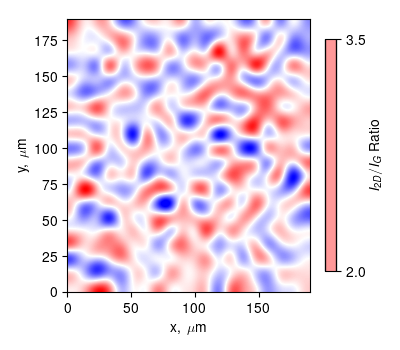

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(4, 3.5)
bounds=[2,3.5]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=4)
im = ax.imshow(matrix, origin='lower', cmap=cm.bwr, aspect='auto', extent=[0,20*9.5,0,20*9.5], interpolation = 'lanczos')
cb = fig.colorbar(im, orientation='vertical', shrink=0.85, boundaries = bounds, norm=norm)
cb.set_label(r'$I_{2D}/I_{G}$ Ratio')
ax.set_xlabel(r'x,\, $\mathrm{\mu m}$')
ax.set_ylabel(r'y,\, $\mathrm{\mu m}$')
ax.grid(False)

In [29]:
fig.savefig("p_p_10_s_al2o3_o.png", dpi = 300)